# Anomaly detection => (To detect outliers)

https://www.youtube.com/watch?v=OS9xRGKfx4E

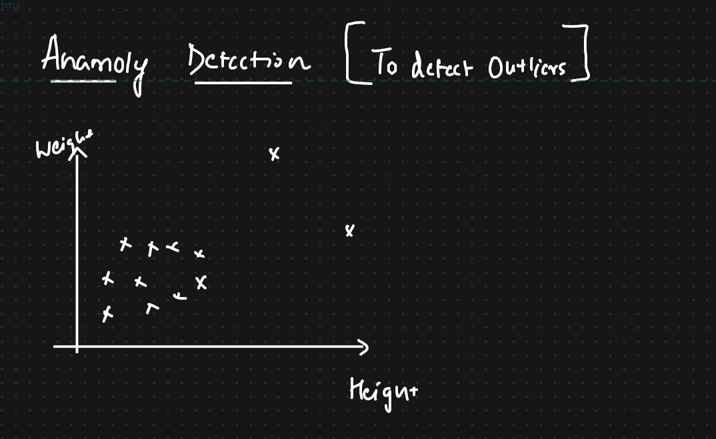

IPL Indian Premier League




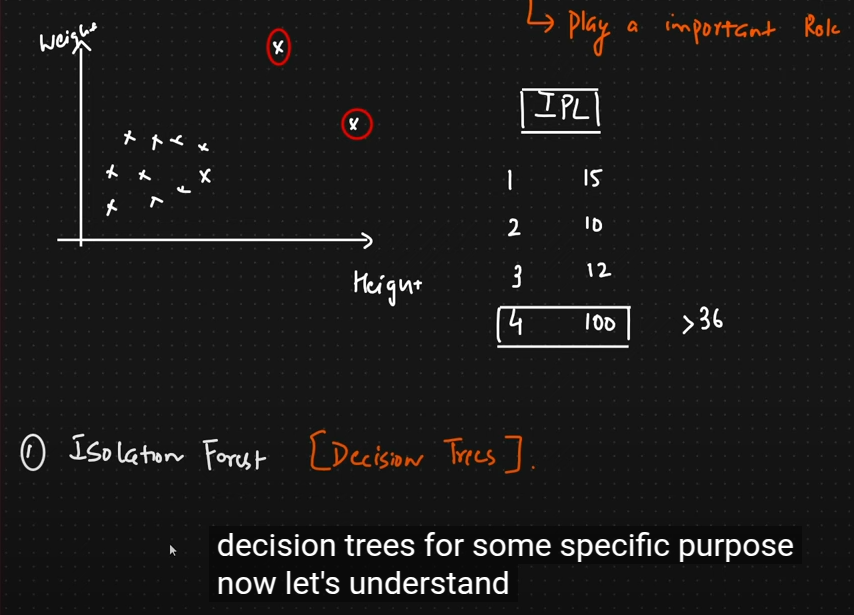

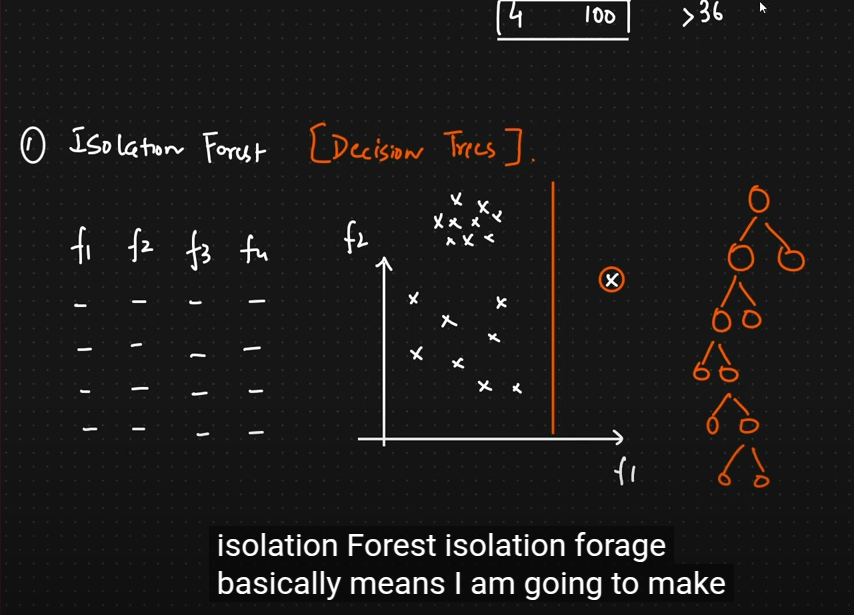

# isolado mais rapidamente

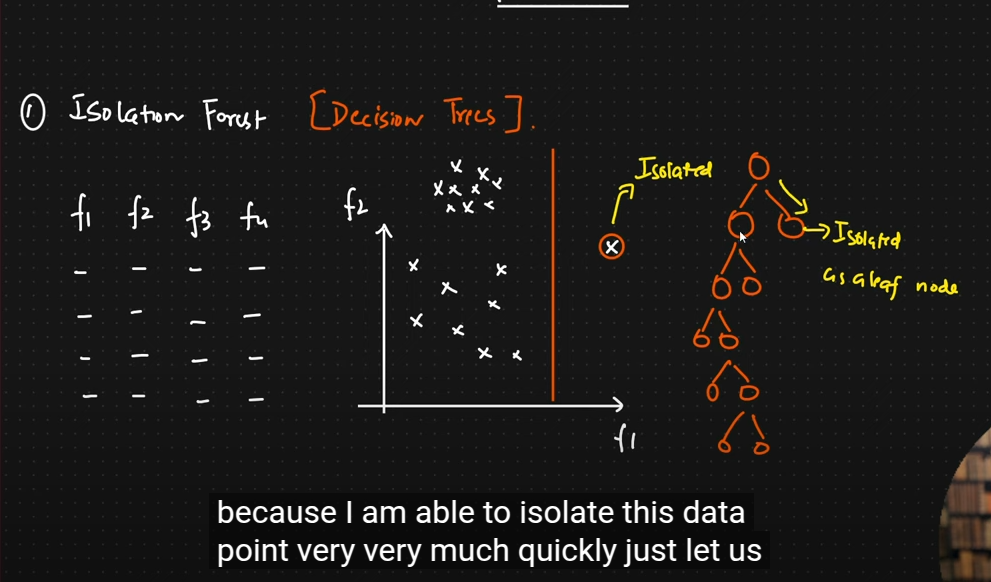

isolated score -> anomaly score

mathematical formula  / (divided)  compute anomaly score. for a new point.

## S(x,n) = 2^[-E(h(x))/c(n)]


n= number of data points

x = data point

#### E(h(x)) = average search depth for x form the isolate. 

#### c(n) = Average depth of h(x) 






isolate forest -> many trees

decision trees


#### E(h(x)) << c(n) => S(x, n) ~ 1 => Anomaly score -> outliers


Threshold >= 0.5


#### E(h(x)) >> c(n) => S(x, n) ~ 0.5 => Normal data point 



## Isolation Forest -> scikit-learn 

https://scikit-learn.org/stable/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [8]:
dados = pd.read_csv('dados_doenca_random.csv')
dados

Sem Doença  Com Doença
0     7.587281    8.510577
1     6.618029   11.199069
2     1.490678    1.687837
3     3.135835    2.747176
4     0.144679    1.741597
..         ...         ...
95    7.472786    5.614075
96   -5.513577   -5.471207
97   -1.379972   -1.493159
98    7.302313    6.965440
99    4.757602    6.728756

[100 rows x 2 columns]

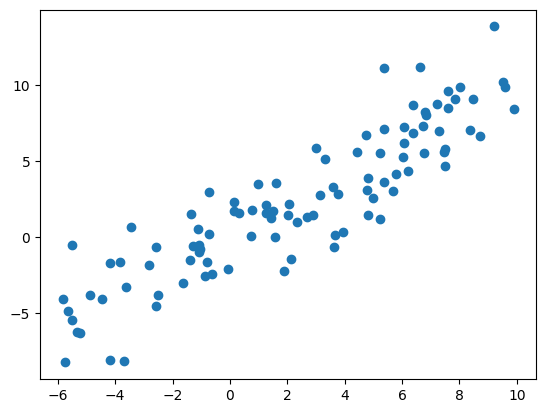

In [9]:
import matplotlib.pyplot as plt
plt.scatter(dados.iloc[:,0], dados.iloc[:,1])



class sklearn.ensemble.IsolationForest(*, n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [11]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.2)
clf.fit(dados)
predictions = clf.predict(dados)


1 normal e -1 anormal

In [12]:
predictions

array([ 1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1])

In [15]:
import numpy as np
abn_index_outliers = np.where(predictions <0)
abn_index_outliers

(array([ 1,  6, 12, 15, 17, 19, 24, 28, 29, 31, 32, 37, 47, 48, 54, 70, 77,
        82, 86, 96]),)

In [16]:
x = dados.values

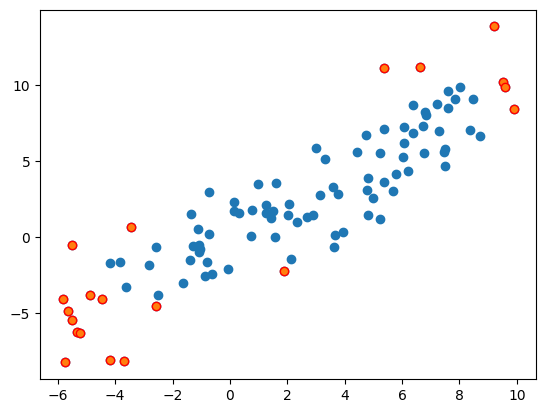

In [17]:
#mesmo index para o outliers

abn_ind =np.where(predictions < 0 )
plt.scatter(dados.iloc[:,0], dados.iloc[:,1])
plt.scatter(x[abn_index_outliers,0], x[abn_index_outliers,1], edgecolors="r")

In [21]:
outlier_data = x[abn_index_outliers]

df_outliers = pd.DataFrame(outlier_data, columns=['Feature 0', 'Feature 1'])
df_outliers

Feature 0  Feature 1
0    6.618029  11.199069
1    9.191945  13.850115
2   -4.875344  -3.772411
3    9.514136  10.227097
4   -5.757700  -8.241751
5    9.886650   8.391975
6   -2.571416  -4.538358
7    5.378358  11.147196
8   -5.325580  -6.247852
9    1.869931  -2.228810
10  -4.182014  -8.055915
11  -5.636275  -4.845012
12  -3.700170  -8.121357
13  -5.241468  -6.327480
14  -4.451726  -4.036226
15  -3.439103   0.659182
16  -5.830635  -4.079295
17   9.581482   9.876747
18  -5.517628  -0.540672
19  -5.513577  -5.471207

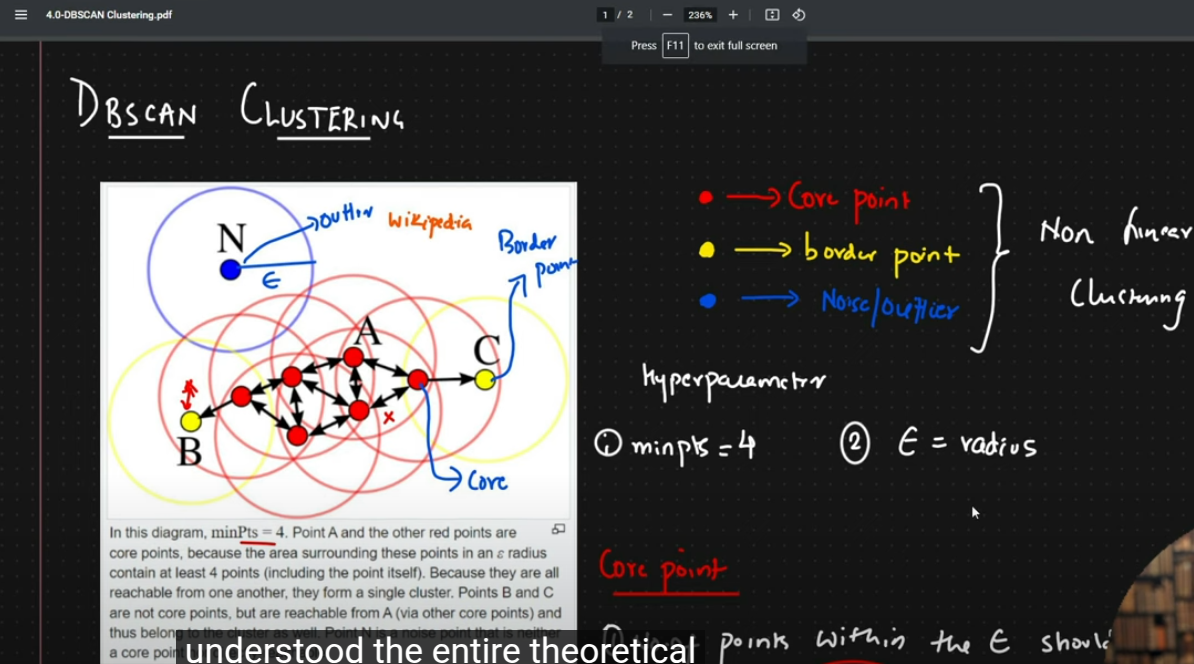

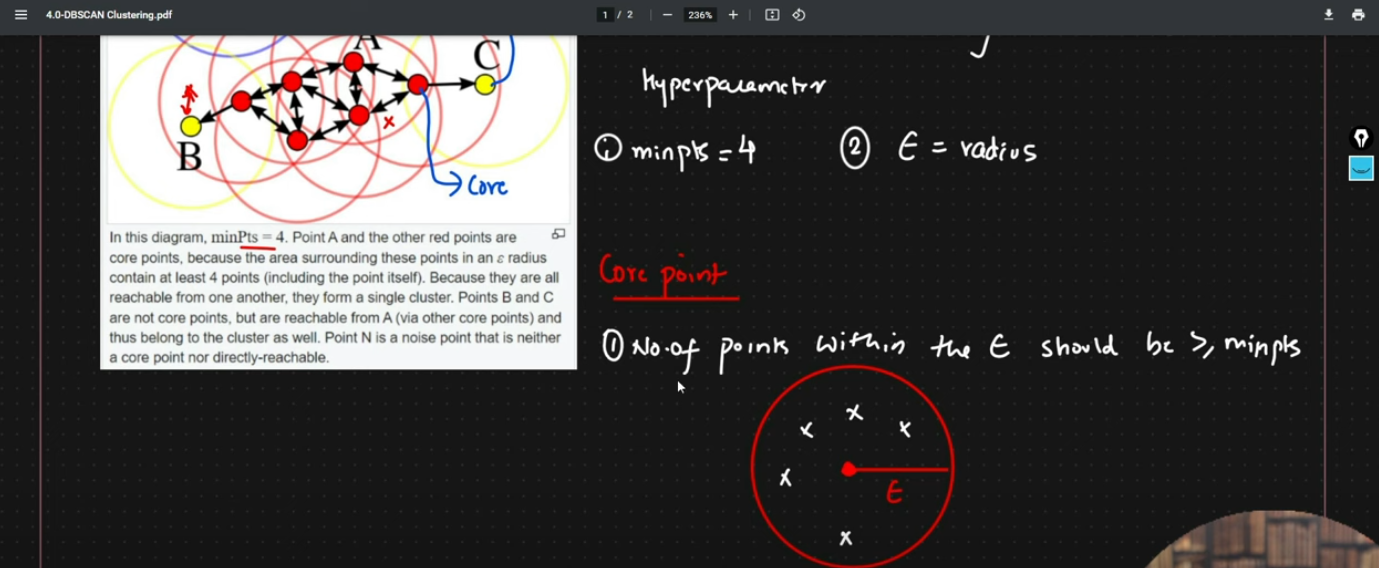

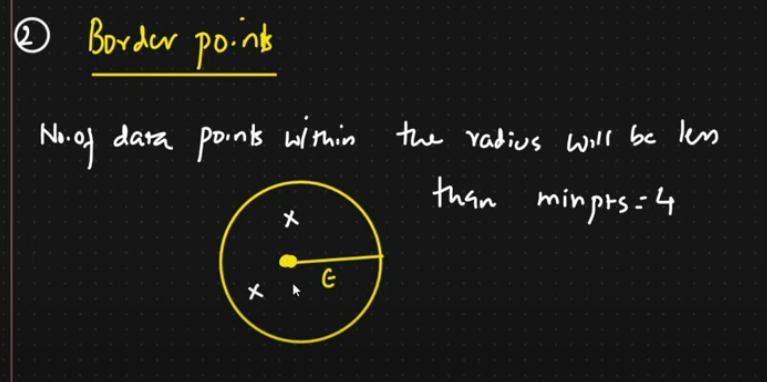

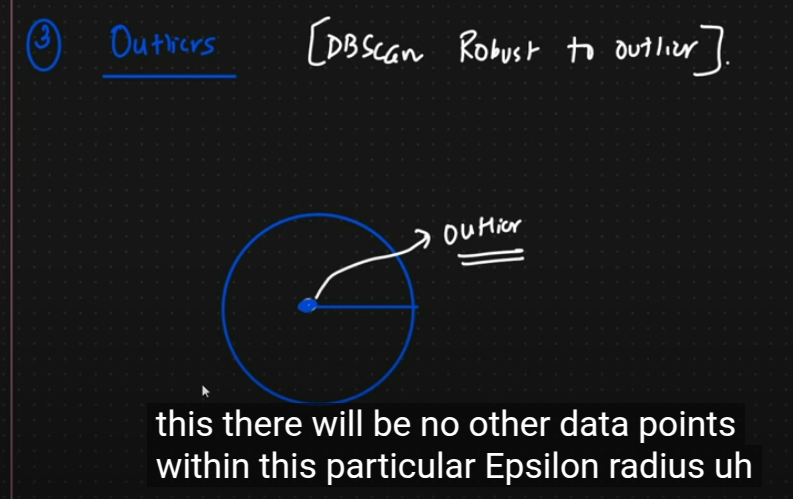

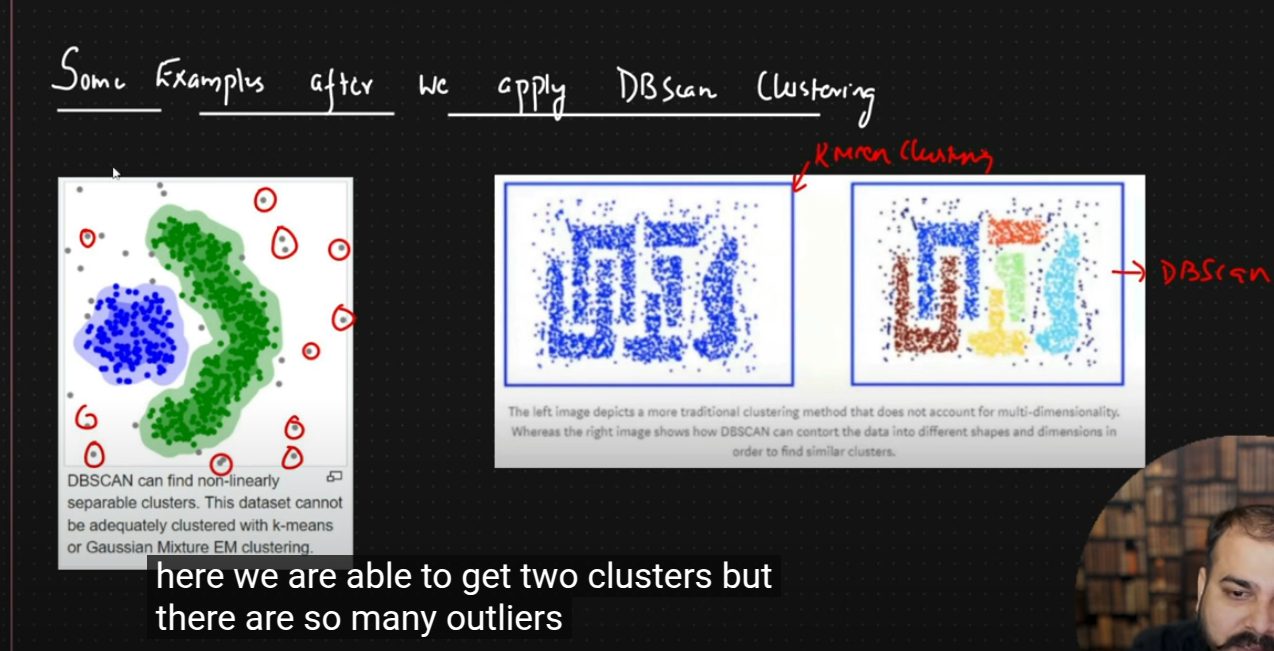

# DBSCAN Clustering

In [22]:


from sklearn.cluster import DBSCAN
# from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [24]:
X, y =make_circles(n_samples =750, factor =0.3, noise =0.1)


In [25]:
X

array([[-0.87952034,  0.51496721],
       [ 0.09257423,  0.30665009],
       [ 0.20996361, -0.26186822],
       ...,
       [ 0.06624775, -0.25435609],
       [ 0.11920744,  0.43080923],
       [-0.07044177, -0.30114687]])

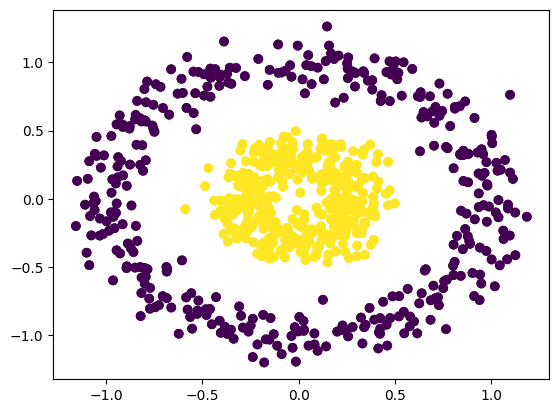

In [27]:


plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [28]:

from sklearn.cluster import DBSCAN

dbcan = DBSCAN(eps=0.10)


In [29]:
dbcan

DBSCAN(eps=0.1)

In [30]:
dbcan.fit_predict(X)

array([ 0,  1,  1, -1, 11,  2, -1,  1, -1,  1,  3,  0,  4,  1,  1,  2,  4,
        1,  6,  5,  1,  1,  6,  3,  1, -1,  7,  4,  1,  1,  6,  4,  1,  1,
        1,  9,  1,  4,  8,  1,  1,  1,  1,  4,  2,  8,  1,  1,  9,  1,  1,
        1,  1,  1,  1,  1,  1,  7,  1,  1,  6, -1,  5,  1,  6,  1,  7,  9,
        1,  1, -1,  7,  6,  4,  7,  1,  6,  6,  6,  1, 12,  1,  7,  1, -1,
        7,  1,  5,  1,  0,  1,  7,  1,  4,  4,  4, -1,  1,  1,  1,  3,  1,
        4,  7,  0,  1, 11, 10,  1,  0, -1,  1,  1,  5,  1,  1,  1,  6, -1,
        1,  6,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  7, 11,  1,  1,  1,
        9,  1,  1,  1,  1,  1, -1,  7,  5,  1,  1, -1, 11,  3, 10,  1,  1,
        7,  9,  1,  1,  1,  1,  1,  9,  2,  3,  7,  1,  0,  1, -1,  1,  1,
       11, 10,  3, 10,  6,  1, 11, 11,  1,  1,  5,  1,  8,  1,  1,  6,  1,
        1,  2,  1,  1, -1,  1,  1,  4,  1,  7,  1,  1,  1,  1,  1,  7,  6,
        1,  1, 10,  8,  1,  2,  5,  1,  1, -1,  7, -1,  9,  1,  1,  7,  1,
        1,  0,  0,  2,  6

In [31]:
# positivos com vários grupos e o -1 outliers; 

In [32]:
dbcan.labels_

array([ 0,  1,  1, -1, 11,  2, -1,  1, -1,  1,  3,  0,  4,  1,  1,  2,  4,
        1,  6,  5,  1,  1,  6,  3,  1, -1,  7,  4,  1,  1,  6,  4,  1,  1,
        1,  9,  1,  4,  8,  1,  1,  1,  1,  4,  2,  8,  1,  1,  9,  1,  1,
        1,  1,  1,  1,  1,  1,  7,  1,  1,  6, -1,  5,  1,  6,  1,  7,  9,
        1,  1, -1,  7,  6,  4,  7,  1,  6,  6,  6,  1, 12,  1,  7,  1, -1,
        7,  1,  5,  1,  0,  1,  7,  1,  4,  4,  4, -1,  1,  1,  1,  3,  1,
        4,  7,  0,  1, 11, 10,  1,  0, -1,  1,  1,  5,  1,  1,  1,  6, -1,
        1,  6,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  7, 11,  1,  1,  1,
        9,  1,  1,  1,  1,  1, -1,  7,  5,  1,  1, -1, 11,  3, 10,  1,  1,
        7,  9,  1,  1,  1,  1,  1,  9,  2,  3,  7,  1,  0,  1, -1,  1,  1,
       11, 10,  3, 10,  6,  1, 11, 11,  1,  1,  5,  1,  8,  1,  1,  6,  1,
        1,  2,  1,  1, -1,  1,  1,  4,  1,  7,  1,  1,  1,  1,  1,  7,  6,
        1,  1, 10,  8,  1,  2,  5,  1,  1, -1,  7, -1,  9,  1,  1,  7,  1,
        1,  0,  0,  2,  6

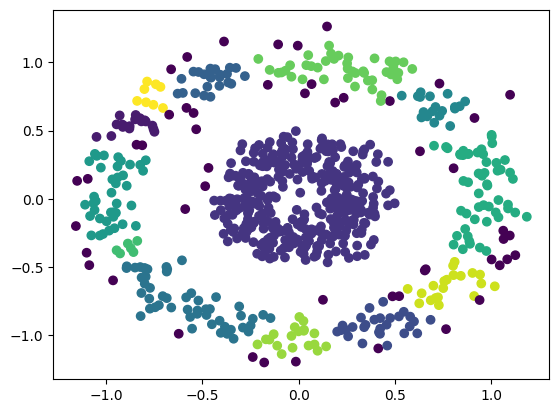

In [38]:

plt.scatter(X[:,0],X[:,1], c=dbcan.labels_)
plt.show()

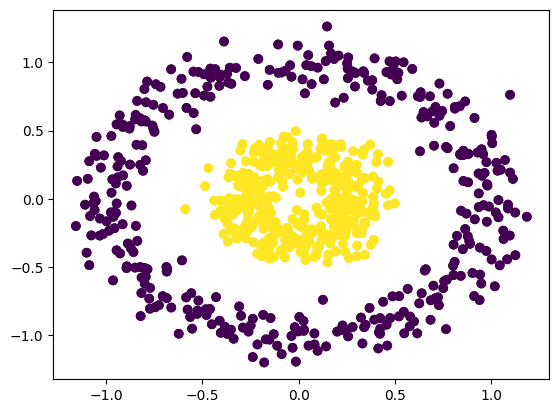

In [35]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

outliers na caneta


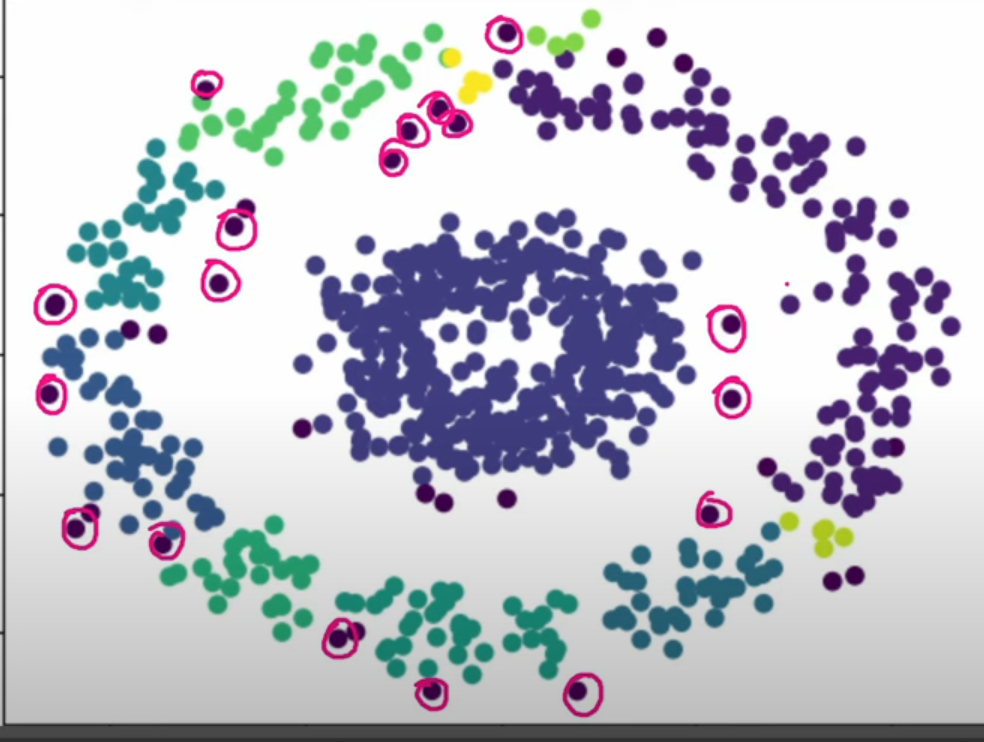

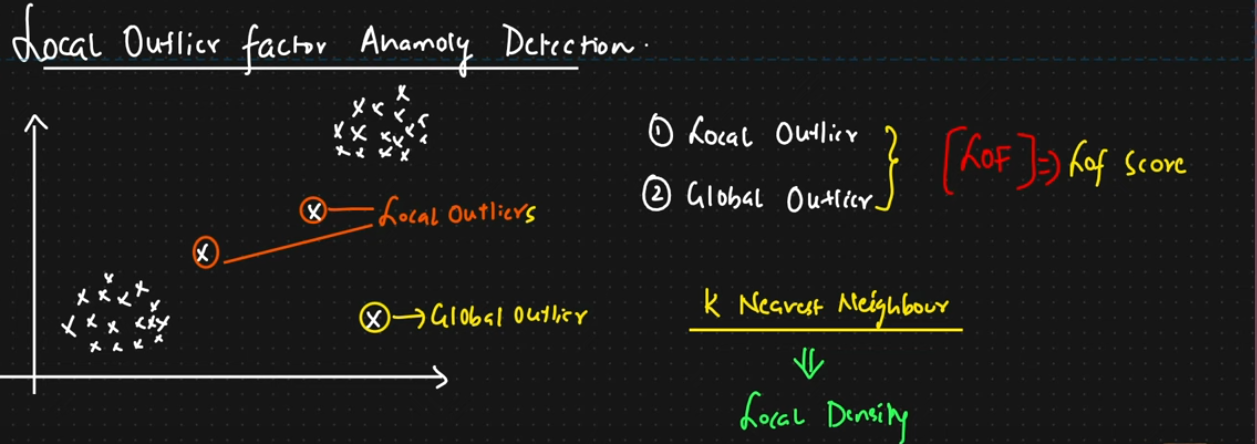

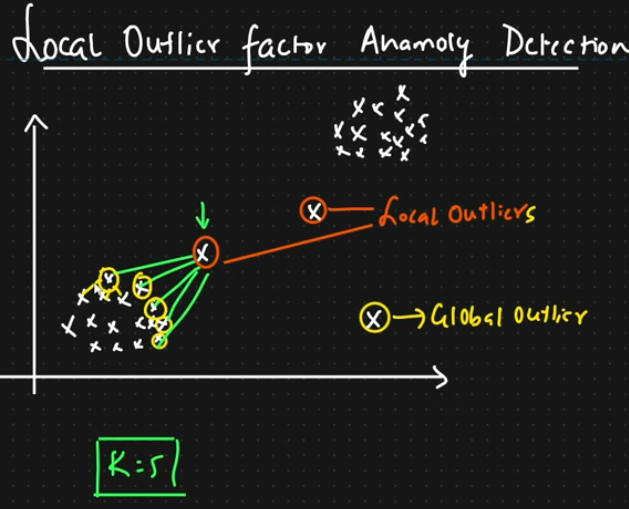

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

# LocalOutlierFactor

class sklearn.neighbors.LocalOutlierFactor(n_neighbors=20, *, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination='auto', novelty=False, n_jobs=None)


The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.



